In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# DataSet Bot Detection(C3)

In [2]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C3_bot_detection_data.csv")
a

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention
...,...,...,...,...,...,...,...,...,...,...,...
49995,491196,uberg,Want but put card direction know miss former h...,64,0,9911,True,1,Lake Kimberlyburgh,2023-04-20 11:06:26,teach quality ten education any
49996,739297,jessicamunoz,Provide whole maybe agree church respond most ...,18,5,9900,False,1,Greenbury,2022-10-18 03:57:35,add walk among believe
49997,674475,lynncunningham,Bring different everyone international capital...,43,3,6313,True,1,Deborahfort,2020-07-08 03:54:08,onto admit artist first
49998,167081,richardthompson,Than about single generation itself seek sell ...,45,1,6343,False,0,Stephenside,2022-03-22 12:13:44,star


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [8]:
b=a[['User ID','Retweet Count','Mention Count','Follower Count','Bot Label']]
c=a['Verified']

In [9]:
b.shape

(50000, 5)

In [10]:
c.shape

(50000,)

In [11]:
fs=StandardScaler().fit_transform(b)

In [12]:
logr=LogisticRegression()
logr.fit(fs,c)

LogisticRegression()

In [13]:
observation=[[16,17,29,30,15]]
prediction=logr.predict(observation)

In [14]:
print(prediction)

[ True]


In [15]:
logr.classes_

array([False,  True])

In [16]:
logr.predict_proba(observation)[0][0]

0.335709885354487

In [17]:
logr.predict_proba(observation)[0][1]

0.664290114645513

# DataSet Framingham(C4)

In [18]:
d=pd.read_csv(r"E:\Python Data Science\Documents\C4_framingham.csv")
d

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [19]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [20]:
e=d.fillna(value=50)
e

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,50.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,50.0,0


In [37]:
f=e.iloc[:,0:8]
g=e.iloc[:,-1]

In [38]:
f.shape

(4238, 8)

In [39]:
g.shape

(4238,)

In [40]:
fs=StandardScaler().fit_transform(f)

In [41]:
logr=LogisticRegression()
logr.fit(fs,g)

LogisticRegression()

In [42]:
observation=[[16,17,29,30,15,54,89,48]]
prediction=logr.predict(observation)

In [44]:
print(prediction)

[1]


In [45]:
logr.classes_

array([0, 1], dtype=int64)

In [46]:
logr.predict_proba(observation)[0][0]

0.0

In [47]:
logr.predict_proba(observation)[0][1]

1.0

# DataSet Health Care Diabetes(C5)

In [62]:
h=pd.read_csv(r"E:\Python Data Science\Documents\C5_health care diabetes.csv")
h

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [63]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
i=h.iloc[:,0:7]
j=h.iloc[:,-1]

In [65]:
i.shape

(768, 7)

In [66]:
j.shape

(768,)

In [67]:
fs=StandardScaler().fit_transform(i)

In [68]:
logr=LogisticRegression()
logr.fit(fs,j)

LogisticRegression()

In [69]:
observation=[[16,17,29,15,54,89,48]]
prediction=logr.predict(observation)

In [70]:
print(prediction)

[1]


In [71]:
logr.classes_

array([0, 1], dtype=int64)

In [72]:
logr.predict_proba(observation)[0][0]

0.0

In [73]:
logr.predict_proba(observation)[0][1]

1.0

# Dataset BMI(C6)

In [75]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C6_bmi.csv")
a

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [84]:
b=a.iloc[:,1:4]
c=a.iloc[:,0]

In [85]:
b.shape

(500, 3)

In [86]:
c.shape

(500,)

In [87]:
fs=StandardScaler().fit_transform(b)

In [88]:
logr=LogisticRegression()
logr.fit(fs,c)

LogisticRegression()

In [89]:
observation=[[17,29,15]]
prediction=logr.predict(observation)

In [90]:
print(prediction)

['Female']


In [91]:
logr.classes_

array(['Female', 'Male'], dtype=object)

In [92]:
logr.predict_proba(observation)[0][0]

0.5588858414280258

In [93]:
logr.predict_proba(observation)[0][1]

0.4411141585719742

# DataSet Used Cars(C7)

In [94]:
a=pd.read_csv(r"E:\Python Data Science\Documents\c7_used_cars.csv")
a

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW
...,...,...,...,...,...,...,...,...,...,...,...
99182,10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
99183,10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
99184,10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
99185,10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi


In [95]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   price         99187 non-null  int64  
 4   transmission  99187 non-null  object 
 5   mileage       99187 non-null  int64  
 6   fuelType      99187 non-null  object 
 7   tax           99187 non-null  int64  
 8   mpg           99187 non-null  float64
 9   engineSize    99187 non-null  float64
 10  Make          99187 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.3+ MB


In [97]:
x=a[['Unnamed: 0','year','price','mileage','tax','mpg']]
y=a['transmission']

In [98]:
x.shape

(99187, 6)

In [99]:
y.shape

(99187,)

In [100]:
fs=StandardScaler().fit_transform(x)

In [101]:
logr=LogisticRegression()
logr.fit(fs,y)

LogisticRegression()

In [102]:
observation=[[17,29,15,45,48,36]]
prediction=logr.predict(observation)

In [103]:
print(prediction)

['Automatic']


In [104]:
logr.classes_

array(['Automatic', 'Manual', 'Other', 'Semi-Auto'], dtype=object)

In [105]:
logr.predict_proba(observation)[0][0]

0.9999967863495606

In [106]:
logr.predict_proba(observation)[0][1]

1.7726707579319361e-28

# DataSet LoanTest(C8-Test)

In [107]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C8_loan-test.csv")
a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [108]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [111]:
b=a[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Education']]
b

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education
0,5720,0,110.0,360.0,1.0,Graduate
1,3076,1500,126.0,360.0,1.0,Graduate
2,5000,1800,208.0,360.0,1.0,Graduate
3,2340,2546,100.0,360.0,NaN,Graduate
4,3276,0,78.0,360.0,1.0,Not Graduate
...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,Not Graduate
363,4158,709,115.0,360.0,1.0,Graduate
364,3250,1993,126.0,360.0,NaN,Graduate
365,5000,2393,158.0,360.0,1.0,Graduate


In [112]:
c=b.fillna(value=548)
c

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education
0,5720,0,110.0,360.0,1.0,Graduate
1,3076,1500,126.0,360.0,1.0,Graduate
2,5000,1800,208.0,360.0,1.0,Graduate
3,2340,2546,100.0,360.0,548.0,Graduate
4,3276,0,78.0,360.0,1.0,Not Graduate
...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,Not Graduate
363,4158,709,115.0,360.0,1.0,Graduate
364,3250,1993,126.0,360.0,548.0,Graduate
365,5000,2393,158.0,360.0,1.0,Graduate


In [113]:
x=c.iloc[:,0:4]
y=c.iloc[:,-1]

In [115]:
x.shape

(367, 4)

In [116]:
y.shape

(367,)

In [117]:
fs=StandardScaler().fit_transform(x)

In [118]:
logr=LogisticRegression()
logr.fit(fs,y)

LogisticRegression()

In [120]:
observation=[[17,29,15,48]]
prediction=logr.predict(observation)

In [121]:
print(prediction)

['Graduate']


In [122]:
logr.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

In [123]:
logr.predict_proba(observation)[0][0]

0.9999999988003091

In [124]:
logr.predict_proba(observation)[0][1]

1.1996909266852505e-09

# DataSet C8-Train

In [126]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C8_loan-train.csv")
a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [127]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [138]:
b=a[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']]
b

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,Y
1,4583,1508.0,128.0,360.0,1.0,N
2,3000,0.0,66.0,360.0,1.0,Y
3,2583,2358.0,120.0,360.0,1.0,Y
4,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y
610,4106,0.0,40.0,180.0,1.0,Y
611,8072,240.0,253.0,360.0,1.0,Y
612,7583,0.0,187.0,360.0,1.0,Y


In [139]:
c=b.fillna(value=65)
c

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,65.0,360.0,1.0,Y
1,4583,1508.0,128.0,360.0,1.0,N
2,3000,0.0,66.0,360.0,1.0,Y
3,2583,2358.0,120.0,360.0,1.0,Y
4,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y
610,4106,0.0,40.0,180.0,1.0,Y
611,8072,240.0,253.0,360.0,1.0,Y
612,7583,0.0,187.0,360.0,1.0,Y


In [140]:
x=c.iloc[:,0:4]
y=c.iloc[:,-1]

In [141]:
x.shape

(614, 4)

In [142]:
y.shape

(614,)

In [143]:
fs=StandardScaler().fit_transform(x)

In [144]:
logr=LogisticRegression()
logr.fit(fs,y)

LogisticRegression()

In [145]:
observation=[[17,29,15,48]]
prediction=logr.predict(observation)

In [146]:
print(prediction)

['N']


In [147]:
logr.classes_

array(['N', 'Y'], dtype=object)

In [148]:
logr.predict_proba(observation)[0][0]

0.955652801962661

In [149]:
logr.predict_proba(observation)[0][1]

0.044347198037339046

# DataSet Data(C9)

In [152]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C9_Data.csv")
a

,row_id,user_id,timestamp,gate_id
0,0,18,2022-07-29 09:08:54,7
1,1,18,2022-07-29 09:09:54,9
2,2,18,2022-07-29 09:09:54,9
3,3,18,2022-07-29 09:10:06,5
4,4,18,2022-07-29 09:10:08,5
...,...,...,...,...
37513,37513,6,2022-12-31 20:38:56,11
37514,37514,6,2022-12-31 20:39:22,6
37515,37515,6,2022-12-31 20:39:23,6
37516,37516,6,2022-12-31 20:39:31,9


In [153]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37518 entries, 0 to 37517
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   row_id     37518 non-null  int64 
 1   user_id    37518 non-null  int64 
 2   timestamp  37518 non-null  object
 3   gate_id    37518 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


Linear Regression

In [155]:
m=a[['row_id','user_id']]
n=a['gate_id']

In [156]:
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.3)

In [159]:
lr=LinearRegression()
lr.fit(m_train,n_train)

LinearRegression()

In [160]:
print(lr.intercept_)

7.259719222582266


In [161]:
coeff=pd.DataFrame(lr.coef_,m.columns,columns=['Co-efficient'])
coeff

,Co-efficient
row_id,-0.000005
user_id,-0.012561


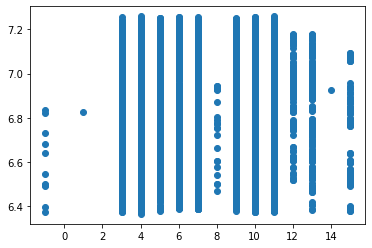

In [162]:
#Predicting

prediction=lr.predict(m_test)
plt.scatter(n_test,prediction)

In [163]:
# Score

print(lr.score(m_test,n_test))

0.006234639613464155


In [164]:
fs=StandardScaler().fit_transform(m)

In [165]:
logr=LogisticRegression()
logr.fit(fs,n)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [166]:
observation=[[12,23]]
prediction=logr.predict(observation)

In [167]:
print(prediction)

[-1]


In [168]:
logr.classes_

array([-1,  0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [169]:
logr.predict_proba(observation)[0][0]

0.9773312203900975

In [170]:
logr.predict_proba(observation)[0][1]

4.371897899877766e-14

Interpretation:
The Prediction score of Linear Regression is 0.006234639613464155
While the the Prediction score of Logostic Regression is 0.9773312203900975
So,while using LogisticRegresssion we can get the Score nearly eqaul to 1(best fit)